# Regresión Lineal
## Concepto y ejemplos

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

Ejemplo: Los siguientes datos representan el tamaño de la casa en pies cudrados y el precio en miles de dolares.
+    'Tamaño (pies cuadrados)': [1500, 1600, 1700, 1800, 1900],
+    'Precio (miles de dólares)': [300, 320, 340, 360, 380]

In [2]:

# Ejemplo de datos: precio de la casa vs. tamaño
data = {
    'Tamaño (pies cuadrados)': [1500, 1600, 1700, 1800, 1900],
    'Precio (miles de dólares)': [300, 320, 340, 360, 380]
}
df = pd.DataFrame(data)

# Definir la variable dependiente (Y) y la independiente (X)
X = df['Tamaño (pies cuadrados)']
Y = df['Precio (miles de dólares)']

# Agregar una constante para el intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(Y, X).fit()

# Resumen del modelo
print(modelo.summary())


                                OLS Regression Results                               
Dep. Variable:     Precio (miles de dólares)   R-squared:                       1.000
Model:                                   OLS   Adj. R-squared:                  1.000
Method:                        Least Squares   F-statistic:                 1.955e+29
Date:                       Tue, 10 Sep 2024   Prob (F-statistic):           2.55e-44
Time:                               20:23:53   Log-Likelihood:                 142.06
No. Observations:                          5   AIC:                            -280.1
Df Residuals:                              3   BIC:                            -280.9
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

c:\Users\Dani\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


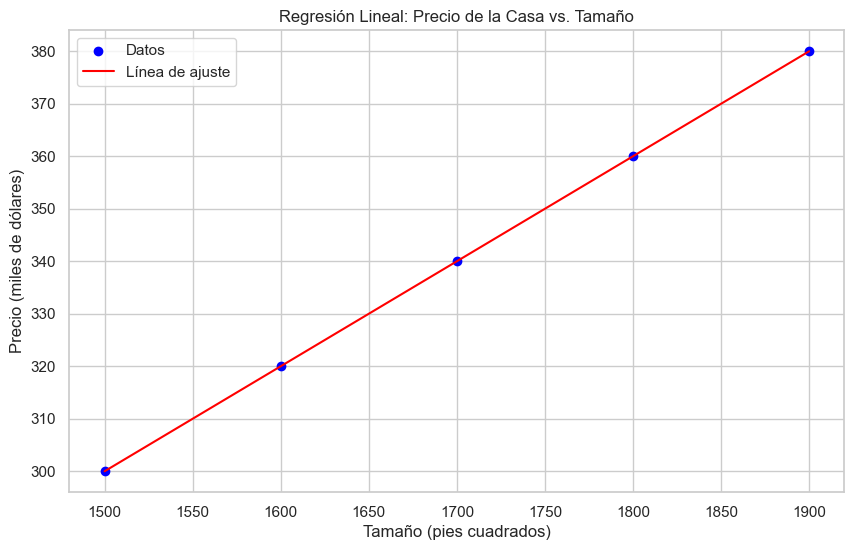

In [3]:

# Graficar los datos y la línea de regresión
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Graficar puntos de datos
plt.scatter(df['Tamaño (pies cuadrados)'], df['Precio (miles de dólares)'], color='blue', label='Datos')

# Graficar la línea de regresión
plt.plot(df['Tamaño (pies cuadrados)'], modelo.predict(X), color='red', label='Línea de ajuste')

# Anotaciones adicionales
plt.title('Regresión Lineal: Precio de la Casa vs. Tamaño')
plt.xlabel('Tamaño (pies cuadrados)')
plt.ylabel('Precio (miles de dólares)')
plt.legend()

# Mostrar la gráfica con las anotaciones adicionales
plt.show()


# Analisis por grafica residual
## Caso 1

+ x 0 1  2  3  4  5 7  8  9  10 
+ y 1 4 8 18 19 24 36 43 42 47


Índice de correlación (Pearson): 0.9920
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     492.0
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           1.80e-08
Time:                        20:33:13   Log-Likelihood:                -21.324
No. Observations:                  10   AIC:                             46.65
Df Residuals:                       8   BIC:                             47.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

c:\Users\Dani\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


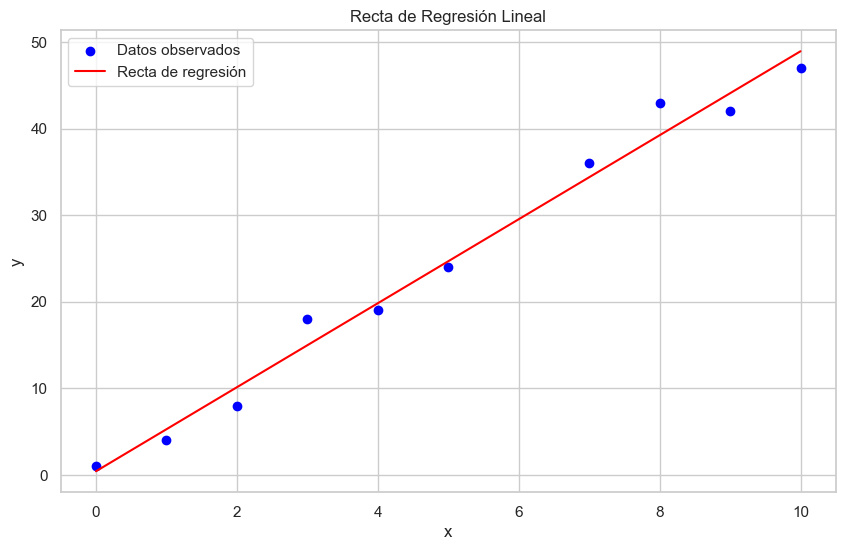

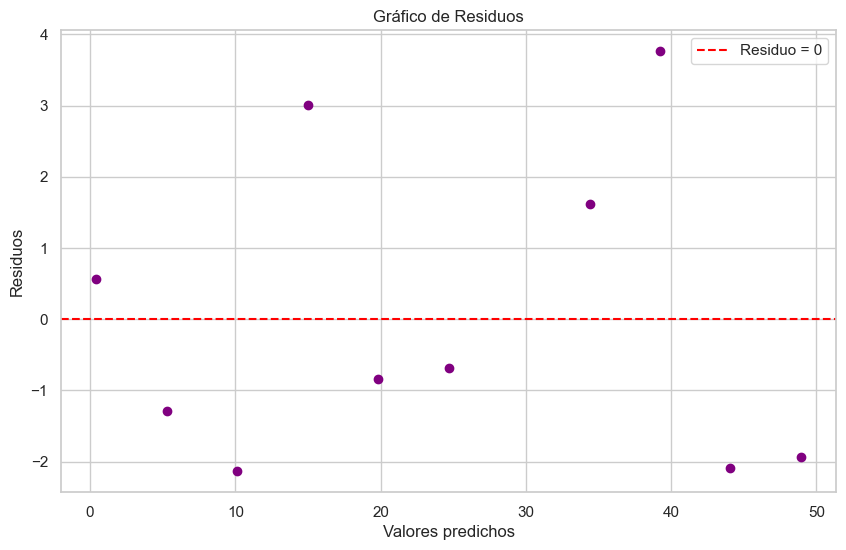

In [9]:
# Caso 1
# Datos
x = np.array([0, 1, 2, 3, 4, 5, 7, 8, 9, 10])
y = np.array([1, 4, 8, 18, 19, 24, 36, 43, 42, 47])

# Paso 1: Calcular el índice de correlación
correlation = np.corrcoef(x, y)[0, 1]
print(f"Índice de correlación (Pearson): {correlation:.4f}")

# Paso 2: Ajustar la recta de regresión
X = sm.add_constant(x)  # Agregar constante para el intercepto
model = sm.OLS(y, X).fit()  # Ajuste del modelo de regresión lineal
print(model.summary())

# Predicciones
y_pred = model.predict(X)

# Paso 3: Graficar la recta de regresión
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Datos observados')
plt.plot(x, y_pred, color='red', label='Recta de regresión')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Recta de Regresión Lineal')
plt.legend()
plt.grid(True)
plt.show()

# Paso 4: Calcular y graficar los residuos
residuals = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(0, color='red', linestyle='--', label='Residuo = 0')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.legend()
plt.grid(True)
plt.show()


**Interpretación del gráfico de los residuos**
+ Todo está bien; los puntos se aproximan a la recta de regresión, de manera que la ecuación de regresión es un buen modelo para describir la asociación entre las dos variables. 
+ La gráfica residual correspondiente no revela un patrón diferente.
+ Parece haber normalidad de los residuos, independencia de los errores y homecedasticidad.

## Caso 2
+ x  0   1   2   3   4   5   7   8   9   10 
+ y  1   0   2   5   10  20   15   10   7   3

Índice de correlación (Pearson): 0.3898
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     1.433
Date:                Tue, 10 Sep 2024   Prob (F-statistic):              0.266
Time:                        20:35:11   Log-Likelihood:                -31.555
No. Observations:                  10   AIC:                             67.11
Df Residuals:                       8   BIC:                             67.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

c:\Users\Dani\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


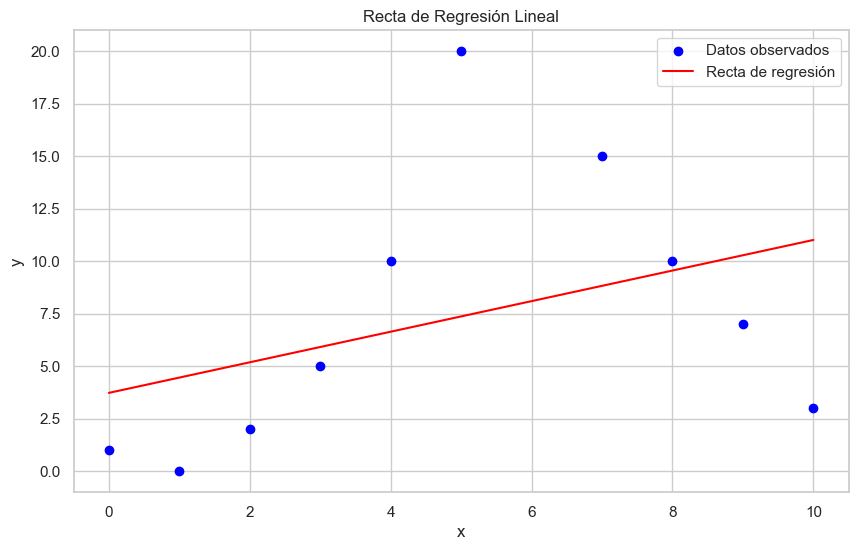

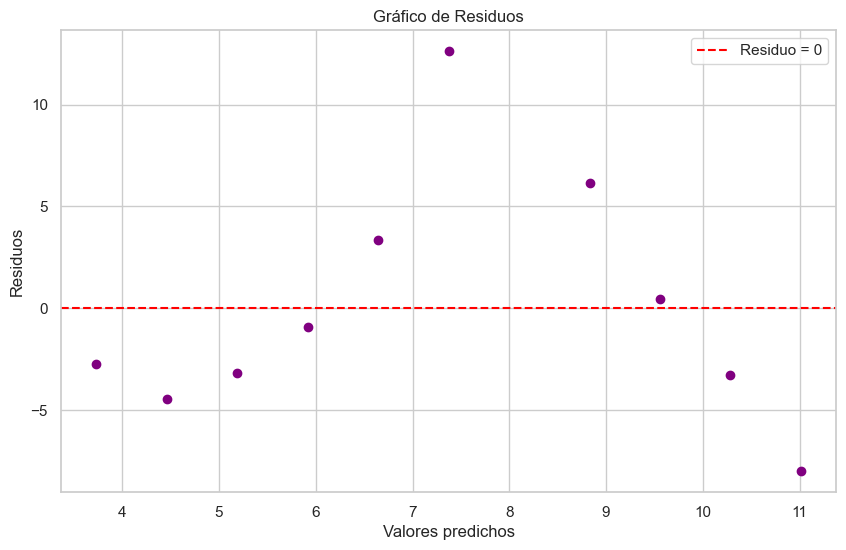

In [10]:
# Caso 2
# Datos
x = np.array([0, 1, 2, 3, 4, 5, 7, 8, 9, 10])
y = np.array([1, 0, 2, 5, 10, 20, 15, 10, 7, 3])

# Paso 1: Calcular el índice de correlación
correlation = np.corrcoef(x, y)[0, 1]
print(f"Índice de correlación (Pearson): {correlation:.4f}")

# Paso 2: Ajustar la recta de regresión
X = sm.add_constant(x)  # Agregar constante para el intercepto
model = sm.OLS(y, X).fit()  # Ajuste del modelo de regresión lineal
print(model.summary())

# Predicciones
y_pred = model.predict(X)

# Paso 3: Graficar la recta de regresión
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Datos observados')
plt.plot(x, y_pred, color='red', label='Recta de regresión')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Recta de Regresión Lineal')
plt.legend()
plt.grid(True)
plt.show()

# Paso 4: Calcular y graficar los residuos
residuals = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(0, color='red', linestyle='--', label='Residuo = 0')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.legend()
plt.grid(True)
plt.show()

**Interpretación**
+ Este caso, genera un diagrama de dispersión que señala una asociación entre las dos variables, pero la relación no es lineal. 
+ La gráfica residual correspondiente indica un patrón diferente, lo que confirma que el modelo lineal no es un buen modelo en este caso.

# Caso 3
+ x  0   1   2   3   4   5   7   8   9   10
+ y  0  6  9  15  10  35  15  60  75  20  

Índice de correlación (Pearson): 0.7013
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     7.745
Date:                Tue, 10 Sep 2024   Prob (F-statistic):             0.0238
Time:                        20:41:03   Log-Likelihood:                -42.367
No. Observations:                  10   AIC:                             88.73
Df Residuals:                       8   BIC:                             89.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

c:\Users\Dani\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


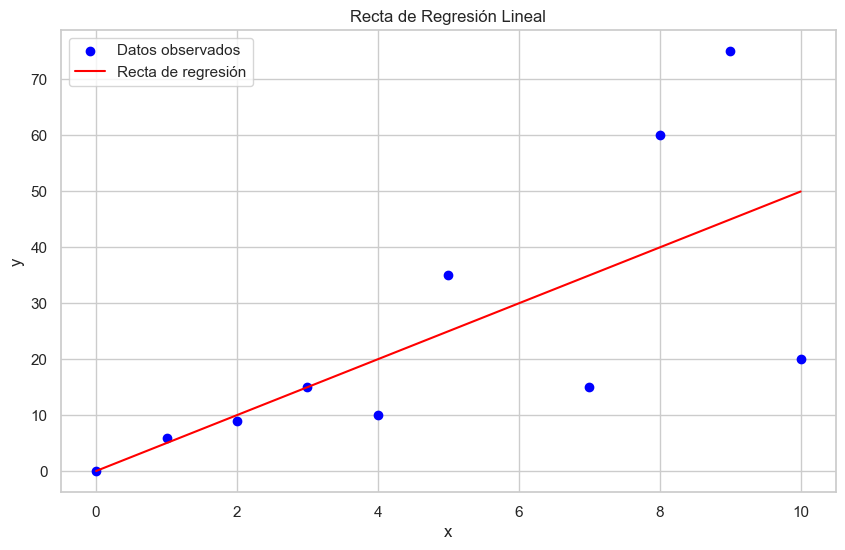

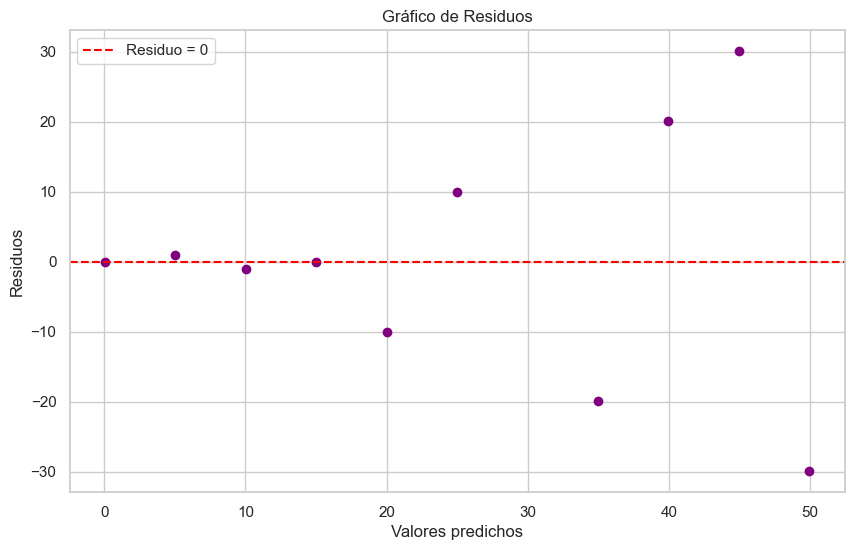

In [11]:
# Caso 3
# Datos
x = np.array([0, 1, 2, 3, 4, 5, 7, 8, 9, 10])
y = np.array([ 0, 6, 9, 15, 10, 35, 15, 60, 75, 20])

# Paso 1: Calcular el índice de correlación
correlation = np.corrcoef(x, y)[0, 1]
print(f"Índice de correlación (Pearson): {correlation:.4f}")

# Paso 2: Ajustar la recta de regresión
X = sm.add_constant(x)  # Agregar constante para el intercepto
model = sm.OLS(y, X).fit()  # Ajuste del modelo de regresión lineal
print(model.summary())

# Predicciones
y_pred = model.predict(X)

# Paso 3: Graficar la recta de regresión
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Datos observados')
plt.plot(x, y_pred, color='red', label='Recta de regresión')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Recta de Regresión Lineal')
plt.legend()
plt.grid(True)
plt.show()

# Paso 4: Calcular y graficar los residuos
residuals = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(0, color='red', linestyle='--', label='Residuo = 0')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.legend()
plt.grid(True)
plt.show()

**Interpretación**
+ Este caso, tiene un diagrama de dispersión en el que los puntos se van alejando de la recta de regresión, 
+ y la gráfica residual revela un patrón de variación creciente.

_________________________________________________________________________________________________________________________________________

*Daniel Christello*